# Final homework

*Akademia Leona Kozminskiego*

#### Descriptive Statistics

*Prof.* Katarzyna Piotrowska 
<br>
*Student:* Alejandro Guzmán Rivera (*23-DS*)

**Instructions** <br>

A simple quantitative, explanatory research (for 5: with the theory-based justification of the hypothesis i.e. literature review with references etc.). At least one variable on the qualitative level of measurement (categorical or ordinal) and one on the quantitative (interval or ratio) level of measurement.<br>

1. Research question and hypothesis (if applicable) – is the research descriptive or explanatory?
2. Variables’ definitions (conceptualisation)
3. Operationalisation (variables’ indicators, their levels and levels of measurement)
4. Subject of the study: observation unit
5. Data collection procedure
6. Data analysis <br>
  6.1. Sample description <br>
  6.2. Bivariate and/or multivariate analyses (at least two different) with the justification of the choice of
    the method and interpretation of the results <br>
  6.3. The purpose of use descriptive statistics (sample description, the answer to research question, other) <br>
10. Conclusions/discussion

## 1. Research question

* What is the impact of crops production in Poland in Greenhouse Gasses (GHG), specifically Nitrous Oxide through the period 1961-2019? 

## 2. Hypothesis

* There is a positive correlation between Cereals, Roots and Tubers and Potatoes production and Nitrous Oxide (N2O) emissions in Poland during the period 1971 to 2018.

## 3. Variables definition

In [2]:
variables_defi = {"y": ["Nitrous Oxide emissions"], 
                  "x1": ["Cereals production"] ,
                  "x2": ["Roots and Tubers production"],
                  "x3": ["Potatoes production"]}
print(tabulate(variables_defi, headers="keys", tablefmt="fancy_grid"))

╒═════════════════════════╤════════════════════╤═════════════════════════════╤═════════════════════╕
│ y                       │ x1                 │ x2                          │ x3                  │
╞═════════════════════════╪════════════════════╪═════════════════════════════╪═════════════════════╡
│ Nitrous Oxide emissions │ Cereals production │ Roots and Tubers production │ Potatoes production │
╘═════════════════════════╧════════════════════╧═════════════════════════════╧═════════════════════╛


## 4. Subject of study

Nitrous Oxide (N2O) emissions according to crops production.

## 5. Data collection procedure

### 5.1 Crop production data collection procedure

#### 5.1.1 Importing libraries

In [148]:
# Tables creation
from tabulate import tabulate

# Tables manipulation and numbers formatting
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Statistical analysis
from matplotlib import pyplot as plt
from matplotlib import figure
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf  

# Graphics creation and aesthetics
import seaborn as sns
sns.set()


#### 5.1.2 Importing the crops dataset

The dataset was obtained from *data.world* which in turn, was taken from the Food and Agriculture Organization of the United Nations (FAO). Specifically, the crop production dataset was taken, which contains statistics of 173 farm products around the world. The original dataset was filtered using SQL by area code, in this case "173" that corresponds to Poland. <br>

In [4]:
data_crops = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1961-crop-production-in-Poland-QueryResult.csv")

#### 5.1.3 Revealing the characteristics of the variables in the dataset.

In [6]:
data_crops_charact = ([["Variable", "Description"],
                        ['area_code', "173"], 
                        ['area', "Poland"], 
                        ['item_code', "Product code"], 
                        ['item', "Product name"], 
                        ['element_code',"Code of the element"], 
                        ['element',"Type of production: Production, area harvested, yield"], 
                        ['unit',"Unit of measurement: tonnes, Ha, Hg/Ha"], 
                        ['year',"Years (1961-2019)"]])

In [7]:
print(tabulate(data_crops_charact, headers= "firstrow", tablefmt='fancy_grid'))

╒══════════════╤═══════════════════════════════════════════════════════╕
│ Variable     │ Description                                           │
╞══════════════╪═══════════════════════════════════════════════════════╡
│ area_code    │ 173                                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ area         │ Poland                                                │
├──────────────┼───────────────────────────────────────────────────────┤
│ item_code    │ Product code                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ item         │ Product name                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ element_code │ Code of the element                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ element      │ Type of production: Production, ar

In [8]:
vars_crops_charact =    ([["Variable", "Type", "Level"],
                        ['area_code', "Integer", "Nominal"], 
                        ['area', "String", "Nominal"], 
                        ['item_code', "Integer", "Nominal"], 
                        ['item', "String", "Nominal"], 
                        ['element_code',"Integer", "Nominal"], 
                        ['element',"String", "Nominal"], 
                        ['unit',"String", "Nominal"], 
                        ['year',"String/Float", "Ratio"]])

In [9]:
print(tabulate(vars_crops_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤══════════════╤═════════╕
│ Variable     │ Type         │ Level   │
╞══════════════╪══════════════╪═════════╡
│ area_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ area         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element_code │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element      │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ unit         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ year         │ String/Float │ Ratio   │
╘══════════════╧══════════════╧═════════╛


#### 5.1.4 Cleaning process of the "data_crops" dataset

##### 5.1.4.1 Checking for NAN values

In [70]:
# Getting a sample of the NAN values
data_crops.isna().sum()
data_crops.isna().T.head().T

,area_code,area,item_code,item,element_code
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
276,False,False,False,False,False
277,False,False,False,False,False
278,False,False,False,False,False
279,False,False,False,False,False


##### 5.1.4.2 Replacing NAN with 0 and grouping the dataset

In [56]:
# Replacing NAN with 0
data_crops.replace(np.nan, 0)

# Describing the data_crops dataset
dataCropsGrouped = data_crops.groupby(["item"]).sum()

#Grouping the data_crops dataset by item
dataCropsGrouped = dataCropsGrouped.drop(columns=["area_code", "item_code", "element_code"])

In [74]:
# dataCropsGrouped set information
dataCropsGrouped
dataCropsGrouped.head()
dataCropsGrouped.T.head().T

,y1971,y1972,y1973,y1974,y1975
item,,,,,
"Almonds, with shell",0.00,0.00,0.00,0.00,0.00
"Anise, badian, fennel, coriander","3,400.00",0.00,0.00,0.00,0.00
Apples,"563,200.00","558,500.00","682,500.00","594,300.00","840,722.00"
Apricots,0.00,0.00,0.00,0.00,0.00
Artichokes,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
"Vegetables, leguminous nes",0.00,0.00,0.00,0.00,0.00
Vetches,"76,706.00","62,621.00","62,000.00","70,000.00","52,600.00"
"Walnuts, with shell",0.00,0.00,0.00,0.00,0.00


##### 5.1.4.5 Checking for the most important crops from **dataCropsGrouped** dataset

In [16]:
dataCropsGroupedSum = dataCropsGrouped.sum(axis=1)

In [75]:
dataCropsGroupedSum.sort_values(ascending=False).head()

item
Cereals, Total            1,583,068,952.00
Roots and Tubers, Total   1,334,122,051.00
Potatoes                  1,334,122,051.00
Sugar Crops Primary         682,033,347.00
Sugar beet                  682,033,347.00
dtype: float64

In [18]:
cleanDataCrops = dataCropsGroupedSum.loc[~(dataCropsGroupedSum == 0)]

The three most prolific crops products produced in Poland between 1961 and 2019 are:

1. Cereals                                 1,866,275,855.00
2. Roots and Tubers                        1,828,499,656.00
3. Potatoes                                1,828,499,656.00


##### 5.1.4.7 Calculating mean and median

In [19]:
print(f"The mean is: {dataCropsGroupedSum.mean()}")
print(f"The median is: {dataCropsGroupedSum.median()}")

The mean is: 83768657.25490196
The median is: 2892161.0


##### 5.1.4.8 Getting all the rows above the median value (3,513,392.5)

In [65]:
# Filtering data by the median value
ImportantDataCrops = cleanDataCrops[cleanDataCrops > 3513392.5]

# Ordering data by descending and getting the first values
ImportantDataCrops.sort_values(ascending=False).head()

item
Cereals, Total            1,583,068,952.00
Potatoes                  1,334,122,051.00
Roots and Tubers, Total   1,334,122,051.00
Sugar beet                  682,033,347.00
Sugar Crops Primary         682,033,347.00
dtype: float64

##### 5.1.4.9 Removing all rows with 0 values from the **dataCropsCleaned** dataset

In [146]:
dataCropsCleaned = dataCropsGrouped.loc[~(dataCropsGrouped == 0).all(axis=1)]

##### 5.1.4.10 Transpose the **dataCropsCleaned** dataset

In [147]:
# Transpose the dataframe to plot
dataCropsTransposed = dataCropsCleaned.transpose()

#### 5.1.5 Plotting **dataCropsTransposed**

In [25]:
# dataCropsTransposed export to CSV to extract elements from R.
dataCropsTransposed.to_csv("dataCropsTransposed.csv", index=False, header=True)

# dataCrops was cleaned and transposed into a new dataset: cropsNitrox which contains data about nitroux oxide and the three crops selected.

In [142]:
cropsNitrox_df = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\CropsNitrox.csv")

In [153]:
cropsNitrox_df.columns

Index(['Year', 'Nitrous.oxide.emissions.', 'Cereals.Total', 'Roots.and.Tubers',
       'Potatoes'],
      dtype='object')

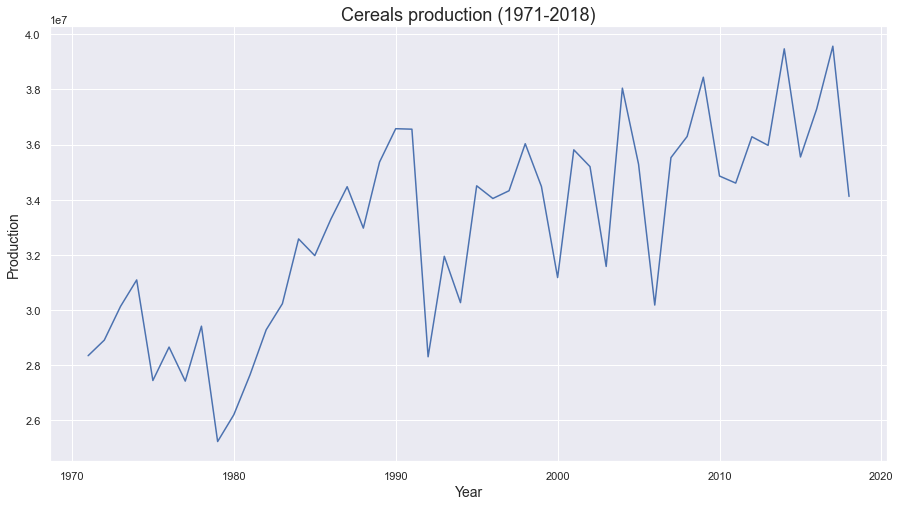

In [158]:
# Plot cereals

plt.figure(figsize=(15,8))
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Production", fontsize= 14)
plt.title("Cereals production (1971-2018)", fontsize= 18)

plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Cereals.Total"])
plt.show();


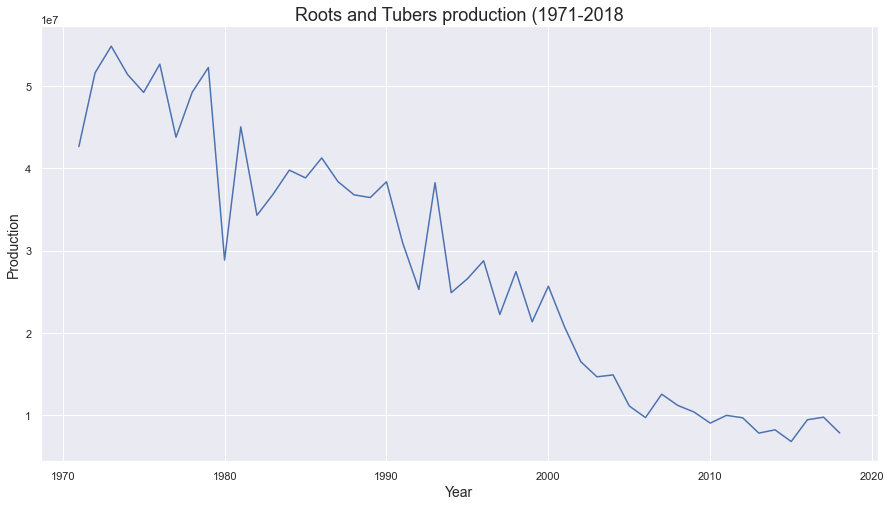

In [167]:
# Plot "Roots and Tubers"
plt.figure(figsize=(15,8))
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Production", fontsize= 14)
plt.title("Roots and Tubers production (1971-2018", fontsize= 18)

plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Roots.and.Tubers"])
plt.show();

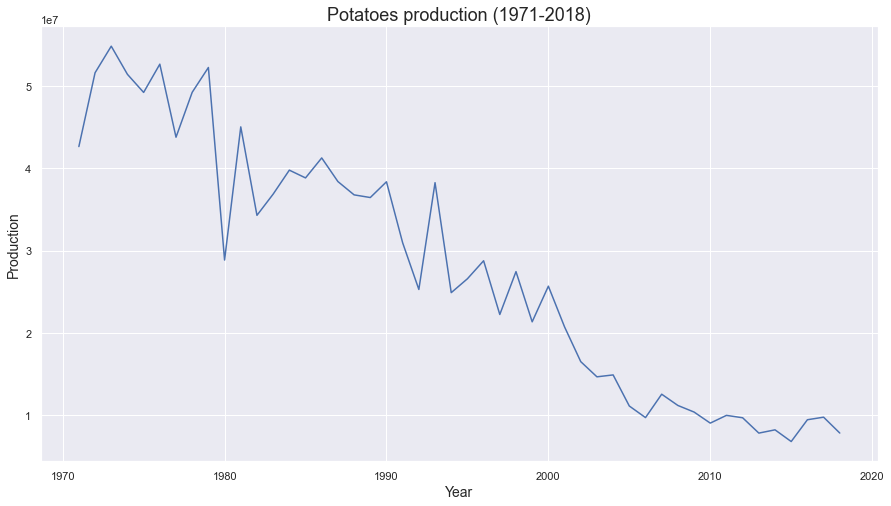

In [166]:
# Plot "Potatoes"

plt.figure(figsize=(15,8))
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Production", fontsize = 14)
plt.title("Potatoes production (1971-2018)", fontsize=18)

plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Potatoes"])
plt.show();

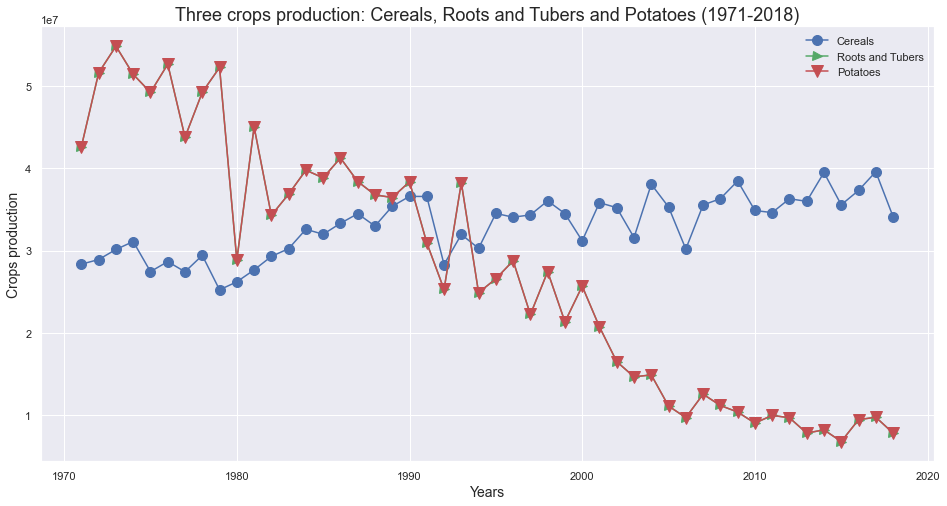

In [182]:
# Base of the plot 
plt.figure(figsize=(16,8))
plt.xlabel("Years", fontsize= 14)
plt.ylabel("Crops production", fontsize= 14)
plt.title("Three crops production: Cereals, Roots and Tubers and Potatoes (1971-2018)", fontsize=18)

# Plot itself
plt.plot(cropsNitrox_df["Year"],cropsNitrox_df["Cereals.Total"], "b-o", markersize=10, label="Cereals")
plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Roots.and.Tubers"], "g->", markersize = 9, label = "Roots and Tubers")
plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Potatoes"], 'r-v', markersize = 12, label = "Potatoes")
plt.legend()
plt.show();


### 5.2 GHG emission data collection procedure

The datasets of Nitrous Oxide (N2O), Methane (CH4) and Carbon dioxide (CO2), were gathered from the *databank.worldbank.org*. Those datasets were filtered using the the tools provided by the website itself to include only Poland from the period from 1971 to 2019.

#### 5.2.1 Loading the dataset

In [188]:
# Loading Nitrous Oxide (N2O) dataset
data_nitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1971-nitrous-TRANSPOSED-Poland.csv", index_col=None)

#### 5.2.2 Describing the N20 dataset

In [189]:
data_nitrox.columns

Index(['Year', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], dtype='object')

In [191]:
vars_ghg_charact = ([["Variable", "Description", "Type", "Level"],
                     ["Series Name", "Nitrous Oxide", "String", "Nominal"],
                     ["Series Code", "Code of the series", "String", "Nominal"],
                     ["Country Name", "Poland", "String", "Nominal"],
                     ["Country Code", "POL", "String", "Nominal"],
                     ["Year", "From 1971 to 2018", "Integer", "Interval"]])

print(tabulate(vars_ghg_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤════════════════════╤═════════╤══════════╕
│ Variable     │ Description        │ Type    │ Level    │
╞══════════════╪════════════════════╪═════════╪══════════╡
│ Series Name  │ Nitrous Oxide      │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Series Code  │ Code of the series │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Country Name │ Poland             │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Country Code │ POL                │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Year         │ From 1971 to 2018  │ Integer │ Interval │
╘══════════════╧════════════════════╧═════════╧══════════╛


In [194]:
print(data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"].describe())

count       48.00
mean    30,026.39
std      8,996.23
min     20,500.00
25%     23,230.00
50%     24,595.00
75%     38,085.51
max     46,495.35
Name: Nitrous oxide emissions (thousand metric tons of CO2 equivalent), dtype: float64


#### 5.2.3 Preparing **data_nitrox** dataset for plotting

In [76]:
# Transforming the data to numeric
pd.to_numeric(data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"]);

#### 5.2.4 Plotting **data_nitrox**

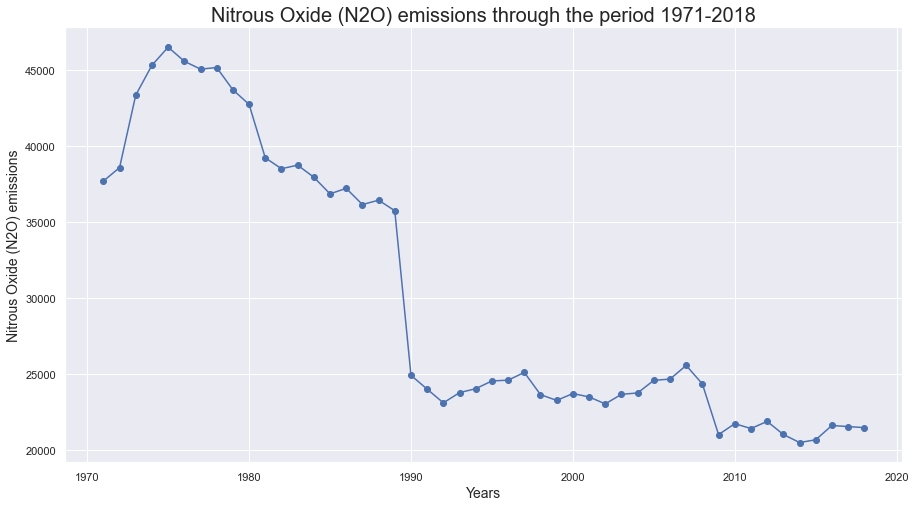

In [195]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Years", fontsize=14)
plt.ylabel("Nitrous Oxide (N2O) emissions", fontsize=14)
plt.title("Nitrous Oxide (N2O) emissions through the period 1971-2018", fontsize=20)

# Plot
plt.plot(data_nitrox["Year"], data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"], "b-o")
plt.show();

## 6. Data analysis

*Sample description*

#### 6.1 Bivariate analysis

##### 6.1.1 Scatter plot  and Regression: N2O vs Cereals

In [213]:
y = data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"]
x1 = cropsNitrox_df["Cereals.Total"]

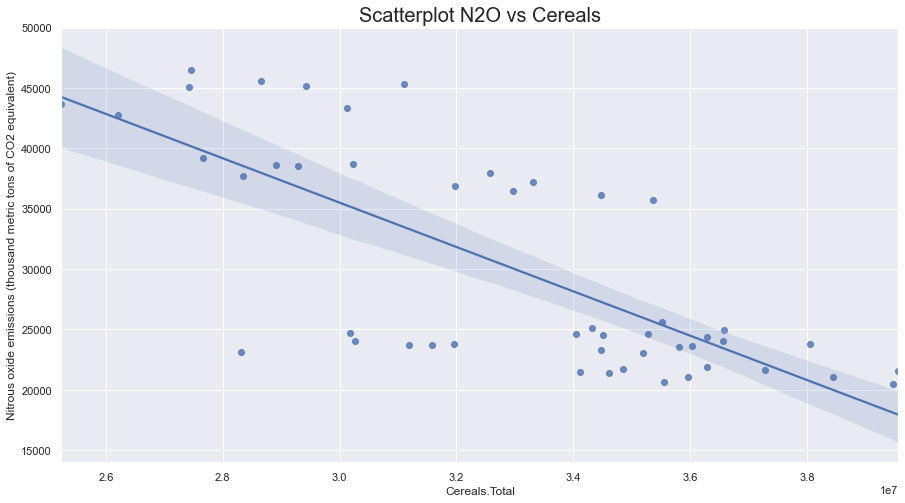

In [214]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Cereals production")
plt.ylabel("N2O emissions")
plt.title("Scatterplot N2O vs Cereals", fontsize=20)

# Scatterplot itself
sns.regplot(x= x1, y= y)
plt.show();

In [215]:
X_cereals = sm.add_constant(x1)
results_cereals = sm.OLS(y,X_cereals).fit()
results_cereals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                   
============================================================================================================================
Dep. Variable:     Nitrous oxide emissions (thousand metric tons of CO2 equivalent)   R-squared:                       0.552
Model:                                                                          OLS   Adj. R-squared:                  0.542
Method:                                                               Least Squares   F-statistic:                     56.57
Date:                                                              Tue, 22 Feb 2022   Prob (F-statistic):           1.51e-09
Time:                                                                      15:44:57   Log-Likelihood:                -485.38
No. Observations:                                                                48   AIC:                             974.8
Df Residuals:                                                                    46   BIC:                             978.5
Df Model:                                                                         1                                         
Covariance Type:                                                          nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.057e+04   8097.572     11.185      0.000    7.43e+04    1.07e+05
Cereals.Total    -0.0018      0.000     -7.521      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        0.590   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.580
Skew:                          -0.245   Prob(JB):                        0.748
Kurtosis:                       2.776   Cond. No.                     3.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 6.1.2 Scatter plot and Regression: Nitrox vs Roots and Tubers

In [212]:
x2 = cropsNitrox_df["Roots.and.Tubers"]

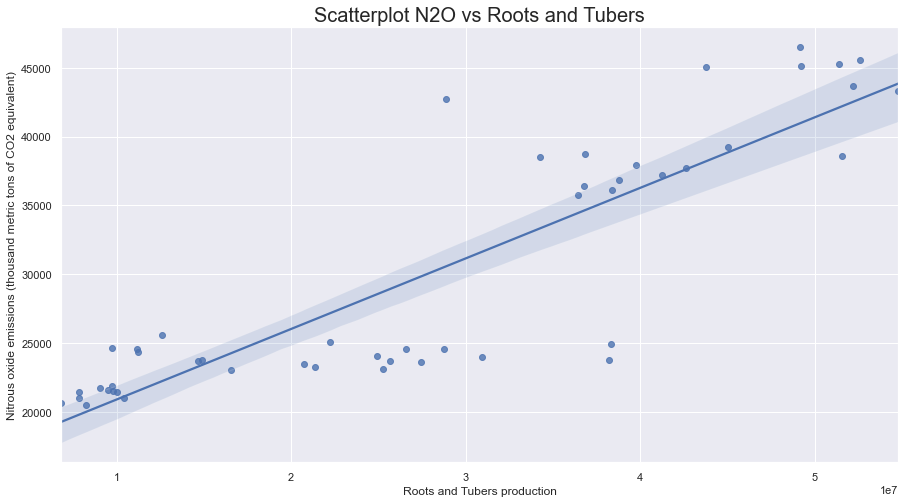

In [217]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Roots and Tubers production")
plt.ylabel("Nitrous oxide emissions")
plt.title("Scatterplot N2O vs Roots and Tubers", fontsize=20)

# Plot itself
sns.regplot(x= x2, y= y)
plt.show();

In [218]:
X_RootsTubers = sm.add_constant(x2)
results_RootsTubers = sm.OLS(y, X_RootsTubers).fit()
results_RootsTubers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                   
============================================================================================================================
Dep. Variable:     Nitrous oxide emissions (thousand metric tons of CO2 equivalent)   R-squared:                       0.766
Model:                                                                          OLS   Adj. R-squared:                  0.761
Method:                                                               Least Squares   F-statistic:                     150.6
Date:                                                              Tue, 22 Feb 2022   Prob (F-statistic):           4.13e-16
Time:                                                                      15:48:55   Log-Likelihood:                -469.77
No. Observations:                                                                48   AIC:                             943.5
Df Residuals:                                                                    46   BIC:                             947.3
Df Model:                                                                         1                                         
Covariance Type:                                                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.58e+04   1322.186     11.946      0.000    1.31e+04    1.85e+04
x1             0.0005   4.17e-05     12.271      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.151   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.277
Skew:                          -0.379   Prob(JB):                        0.194
Kurtosis:                       4.031   Cond. No.                     6.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 6.1.3 Scatter plot and Regression: Nitrox vs Potatoes

In [219]:
x3 = cropsNitrox_df["Potatoes"]

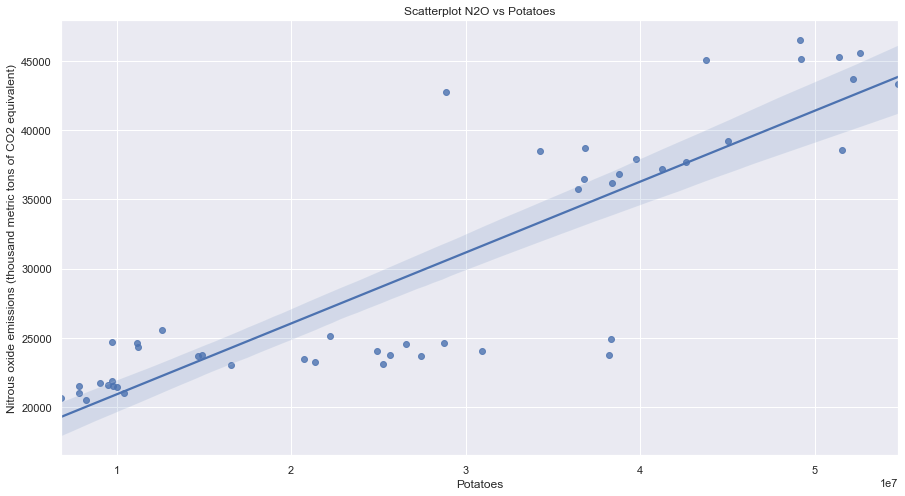

In [221]:
#Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Potatoes production")
plt.ylabel("Nitrous oxide emissions")
plt.title("Scatterplot N2O vs Potatoes")

# Scatterplot itself
sns.regplot(x= x3, y= y)
plt.show()

In [222]:
X_Potatoes = sm.add_constant(x3)
results_Potatoes = sm.OLS(y, X_Potatoes).fit()
results_Potatoes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                   
============================================================================================================================
Dep. Variable:     Nitrous oxide emissions (thousand metric tons of CO2 equivalent)   R-squared:                       0.766
Model:                                                                          OLS   Adj. R-squared:                  0.761
Method:                                                               Least Squares   F-statistic:                     150.6
Date:                                                              Tue, 22 Feb 2022   Prob (F-statistic):           4.13e-16
Time:                                                                      15:50:48   Log-Likelihood:                -469.77
No. Observations:                                                                48   AIC:                             943.5
Df Residuals:                                                                    46   BIC:                             947.3
Df Model:                                                                         1                                         
Covariance Type:                                                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.58e+04   1322.186     11.946      0.000    1.31e+04    1.85e+04
Potatoes       0.0005   4.17e-05     12.271      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.151   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.277
Skew:                          -0.379   Prob(JB):                        0.194
Kurtosis:                       4.031   Cond. No.                     6.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 6.2 Multiple variables analysis

A new file was created in RStudio. This file contains the two datasets merged.

In [224]:
CropsNitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\CropsNitrox.csv")

In [230]:
CropsNitrox.loc[ : , CropsNitrox.columns != "Year"].describe()

,Nitrous.oxide.emissions.,Cereals.Total,Roots.and.Tubers,Potatoes
count,48.00,48.00,48.00,48.00
mean,"30,026.39","32,980,603.17","27,794,209.40","27,794,209.40"
std,"8,996.23","3,639,354.81","15,377,540.62","15,377,540.62"
min,"20,500.00","25,234,198.00","6,824,231.00","6,824,231.00"
25%,"23,230.00","30,170,408.00","11,184,625.75","11,184,625.75"
50%,"24,595.00","34,084,246.00","27,010,621.50","27,010,621.50"
75%,"38,085.51","35,616,846.50","39,051,279.75","39,051,279.75"
max,"46,495.35","39,568,956.00","54,800,486.00","54,800,486.00"


In [231]:
CropsNitrox.head()

,Year,Nitrous.oxide.emissions.,Cereals.Total,Roots.and.Tubers,Potatoes
0,1971,"37,691.04",28346210,42619605,42619605
1,1972,"38,576.71",28911646,51574900,51574900
2,1973,"43,345.13",30132506,54800486,54800486
3,1974,"45,306.19",31093909,51383477,51383477
4,1975,"46,495.35",27446629,49189801,49189801


In [232]:
CropsNitrox.columns

Index(['Year', 'Nitrous.oxide.emissions.', 'Cereals.Total', 'Roots.and.Tubers',
       'Potatoes'],
      dtype='object')

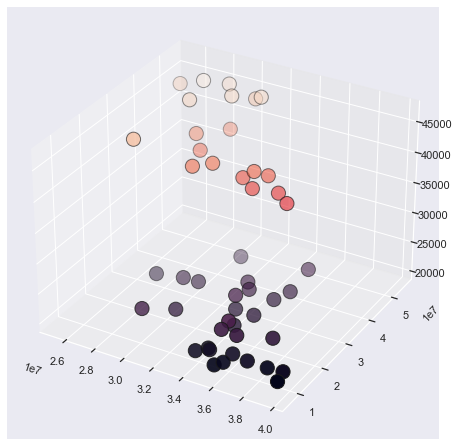

In [235]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

x1_Cereals = CropsNitrox["Cereals.Total"]
x2_RnT = CropsNitrox['Roots.and.Tubers']
x3_Potatoes = CropsNitrox['Potatoes']
y_ntwoo = CropsNitrox['Nitrous.oxide.emissions.']

ax.scatter(x1_Cereals, x3_Potatoes, y_ntwoo, 
           edgecolor = "k",
           s= 200,
           c= y_ntwoo);

In [236]:
regMultiNitrox = smf.ols("y_ntwoo ~ x1_Cereals + x2_RnT + x3_Potatoes", 
                         data = CropsNitrox).fit()

In [237]:
regMultiNitrox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_ntwoo   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     92.76
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.09e-16
Time:                        16:00:42   Log-Likelihood:                -465.41
No. Observations:                  48   AIC:                             936.8
Df Residuals:                      45   BIC:                             942.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.083e+04   8458.901      4.827      0.000    2.38e+04    5.79e+04
x1_Cereals     -0.0007      0.000     -2.991      0.004      -0.001      -0.000
x2_RnT      -1.512e-05   6.74e-05     -0.224      0.824      -0.000       0.000
x3_Potatoes     0.0004   2.99e-05     14.034      0.000       0.000       0.000
==============================================================================
Omnibus:                        5.907   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.172
Skew:                          -0.797   Prob(JB):                       0.0753
Kurtosis:                       3.212   Cond. No.                     3.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

*Answer of the research question*

#### 7. Conclusion/Discussion